# 프로젝트 목표
- 서울시 코로나19 확진자 현황 데이터를 분석하여 유의미한 정보 도출
- 데이터 분석을 위한 데이터 정제, 특성 분석, 시각화


## 프로젝트 수행 과정
1. 데이터 수집   
  코로나 감염 데이터를 수집하여 DataFrame 구조 확인  

2. 데이터 전처리  
  유용한 데이터만 사용하기 위한 데이터 전처리     

3. 데이터 시각화  
 각 변수 별로 추가적인 정제를 하여 시각화를 통한 데이터의 특성 파악

 데이터 출처 :    
http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do  





## 데이터 수집 및 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corona_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Covid_Data/서울시 코로나19 확진자 현황.csv")
# utf-8' codec can't decode 에러 발생시 인코딩 변경 [euc-kr / cp949 사용]



In [2]:
corona_all.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


In [3]:
corona_all.info()
#데이터 요약 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      5748 non-null   int64  
 1   확진일     5748 non-null   object 
 2   환자번호    5748 non-null   int64  
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      5748 non-null   object 
 6   여행력     459 non-null    object 
 7   접촉력     5748 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      5357 non-null   object 
 10  이동경로    5520 non-null   object 
 11  등록일     5748 non-null   object 
 12  수정일     5748 non-null   object 
 13  노출여부    5748 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 628.8+ KB


In [4]:
#필요한 데이터만 추출
corona_data = corona_all[['확진일','지역','접촉력','상태']]
corona_data.head()


,확진일,지역,접촉력,상태
0,10.21.,양천구,감염경로 조사중,NaN
1,10.21.,강동구,강남서초 지인모임,NaN
2,10.21.,강남구,기타 확진자 접촉,NaN
3,10.21.,관악구,감염경로 조사중,NaN
4,10.21.,관악구,기타 확진자 접촉,NaN


In [5]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   확진일     5748 non-null   object
 1   지역      5748 non-null   object
 2   접촉력     5748 non-null   object
 3   상태      5357 non-null   object
dtypes: object(4)
memory usage: 179.8+ KB


## 데이터 시각화 및 분석

In [6]:
corona_data['확진일']

0       10.21.
1       10.21.
2       10.21.
3       10.21.
4       10.21.
         ...  
5743     1.31.
5744     1.30.
5745     1.30.
5746     1.30.
5747     1.24.
Name: 확진일, Length: 5748, dtype: object

In [7]:
# 데이터 시각화를 위해 확진일 데이터를 month,day로 분리하여 저장
month = []
day = []

for data in corona_data['확진일']:
  month.append(data.split('.')[0])
  day.append(data.split('.')[1])

In [ ]:
corona_data['month'] = month
corona_data['day'] = day

corona_data['month'].astype('int64')
corona_data['day'].astype('int64')

In [9]:
# 월별 확진자 수 출력
order = []
for i in range(1,11):
  order.append(str(i))
order

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

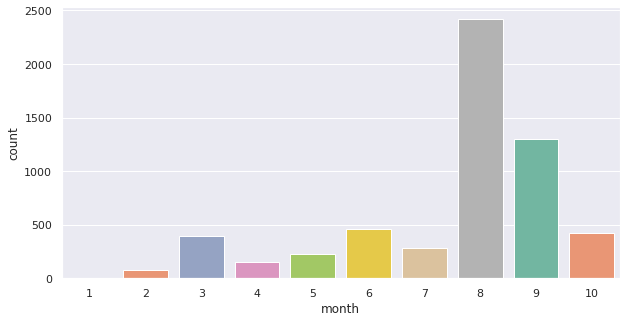

In [10]:
# 그래프의 사이즈를 조절
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력
sns.set(style="darkgrid")
ax = sns.countplot(x="month", data=corona_data, palette="Set2", order = order)

In [11]:
#value_count() 함수로 각 데이터의 갯수를 파악 후 내림차순 정렬
corona_data['month'].value_counts()

8     2416
9     1304
6      460
10     425
3      391
7      281
5      228
4      156
2       80
1        7
Name: month, dtype: int64

✔ 그래프와 데이터로 확인 결과 8월달의 코로나 확진자 수가 가장 많은 것을 알 수 있었습니다.

In [12]:
# 8월 달의 일자별 확진자 추이 그래프 출력
order2 = []
for i in range(1,32):
  order2.append(str(i))

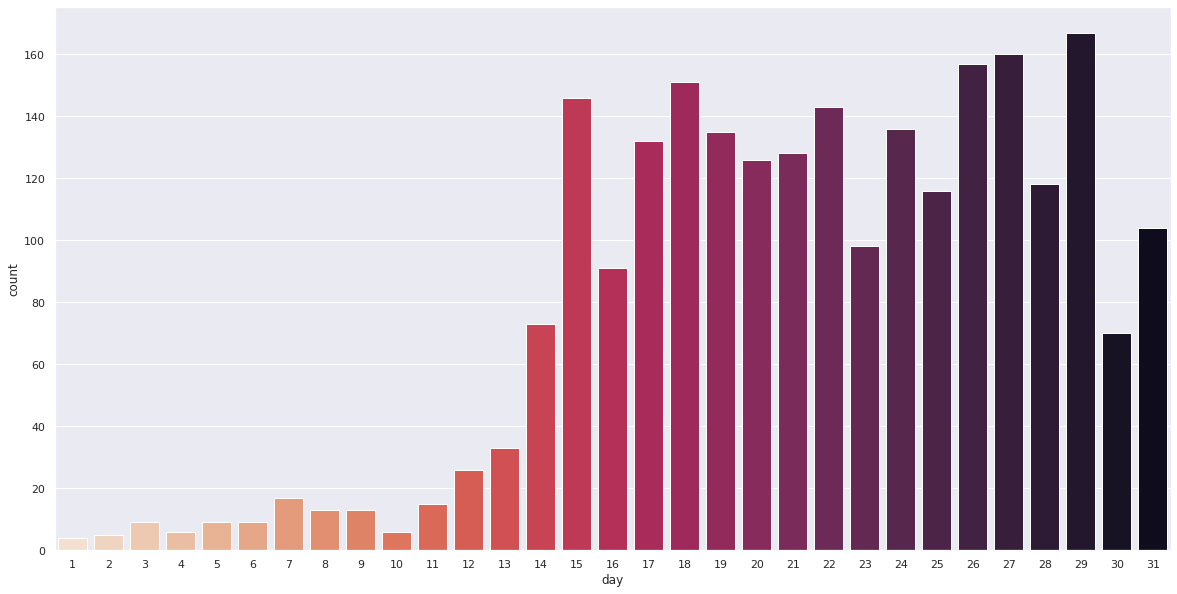

In [13]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="day", data = corona_data[corona_data['month']=='8'], palette="rocket_r", order = order2)

In [14]:
covid_08 = corona_data[corona_data['month'] == '8']['day'].value_counts().mean()
covid_08

77.93548387096774

✔ 데이터 분석 결과 확진자가 가장 많았던 8월은 중순 이후로 확진자 수가 급격히 늘어 났으며, 일별 평균 확진자 수는 약 78명 입니다.

In [15]:
# 지역별 확진자 수 출력
corona_data['지역']

0       양천구
1       강동구
2       강남구
3       관악구
4       관악구
       ... 
5743    성북구
5744    마포구
5745    종로구
5746    중랑구
5747    강서구
Name: 지역, Length: 5748, dtype: object

In [ ]:
# 한글폰트 설정을 위해 colab 에 나눔 폰트 설치 ( 에러 발생시 런타임 재시작 )
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [17]:
import matplotlib.font_manager as fm
#폰트 설정

plt.rc('font', family='NanumBarunGothic') 


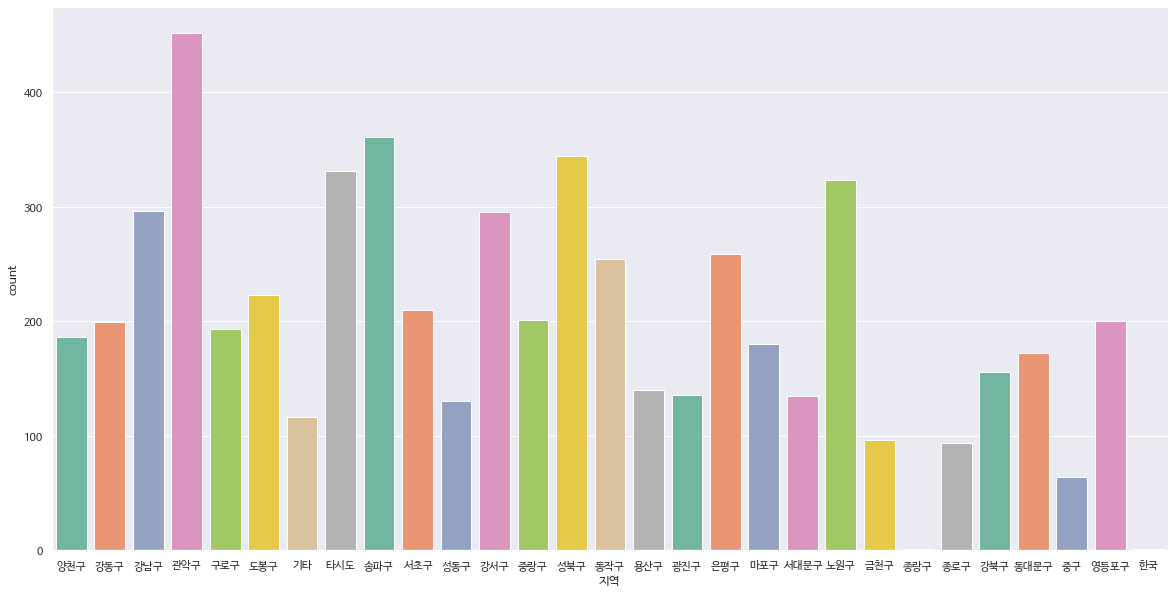

In [18]:

plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_data, palette="Set2")

지역 이상치 데이터 처리
- 기존 지역 데이터 특성에 맞도록 변경  
[종랑구 → 중랑구, 한국 → 기타 ]

In [171]:
corona_out_region = corona_data.replace({'종랑구':'중랑구','한국':'기타'})

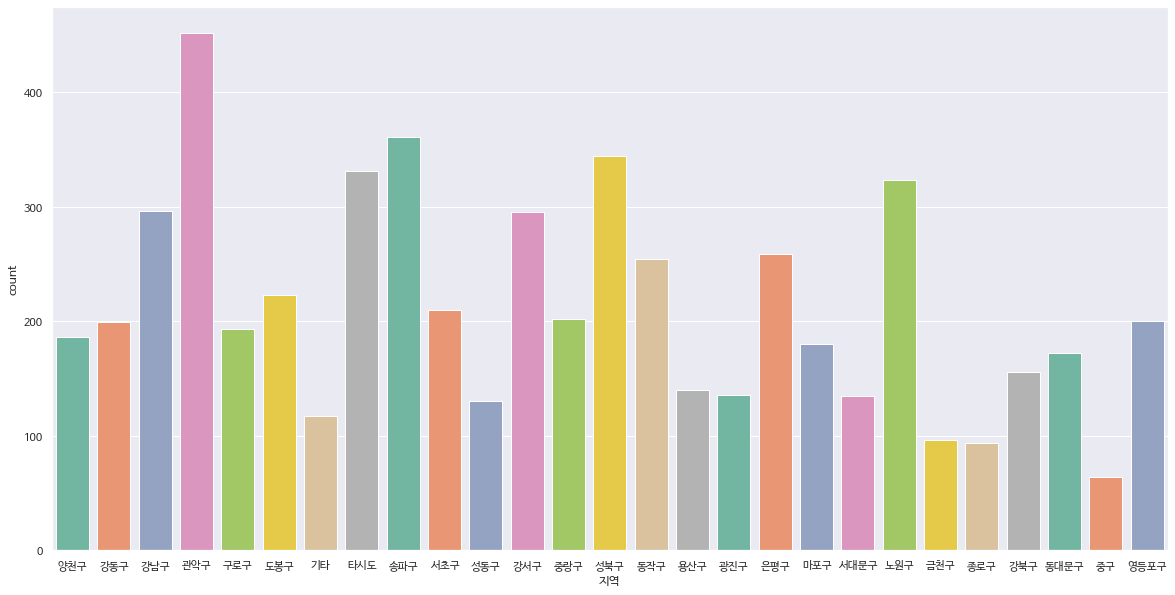

In [20]:
# 이상치 처리된 데이터
plt.figure(figsize=(20,10))
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_out_region, palette="Set2")

In [173]:
# value_counts()는 각 데이터를 세어서 내림차순으로 정리
# 확진자가 가장 많은 달 확인
corona_data['month'].value_counts()

8     2416
9     1304
6      460
10     425
3      391
7      281
5      228
4      156
2       80
1        7
Name: month, dtype: int64

In [21]:
# 확진자가 많았던 8월의 지역별 데이터 확인
corona_out_region[corona_data['month'] == '8']

,확진일,지역,접촉력,상태,month,day
1271,8.31.,타시도,감염경로 조사중,퇴원,8,31
1272,8.25.,타시도,성북구 사랑제일교회 관련,NaN,8,25
1273,8.26.,타시도,타시도 확진자 접촉,퇴원,8,26
1274,8.27.,타시도,기타 확진자 접촉,퇴원,8,27
1504,8.30.,타시도,감염경로 조사중,퇴원,8,30
...,...,...,...,...,...,...
4140,8.2.,용산구,해외 접촉 추정,퇴원,8,2
4141,8.1.,양천구,송파구 확진자 접촉,퇴원,8,1
4142,8.1.,종로구,종로구 지인모임 신명투자,퇴원,8,1
4144,8.1.,강서구,강서구 요양시설관련,퇴원,8,1


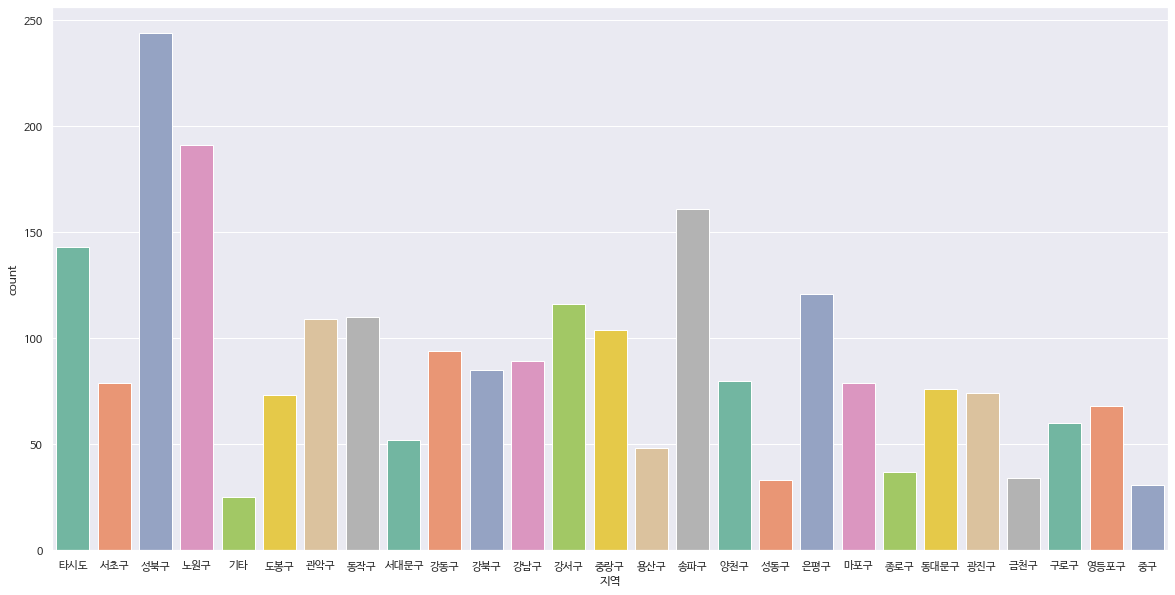

In [22]:
# 8월의 지역별 감염자 그래프 출력
plt.figure(figsize=(20,10))
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_out_region[corona_data['month'] == '8'], palette="Set2")

✔ 확진자가 가장 많았던 지역인 관악구의 월별 확진자 추이를 확인합니다.

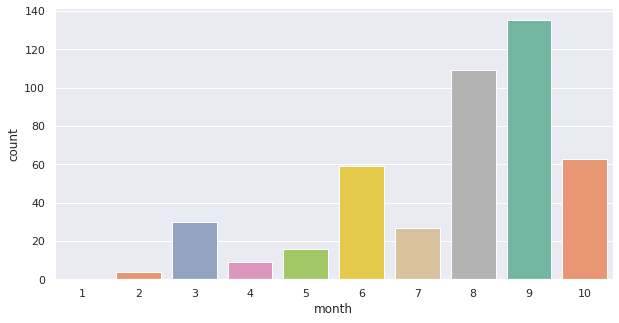

In [23]:
# 관악구의 월별 확진자 추이 그래프 
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="month", data=corona_out_region[corona_out_region['지역'] == '관악구'], palette="Set2", order = order)

✔ 서울 지역의 확진자를 지도에 출력하여 확인 합니다.  
   (지도 출력을 위한 folium 패키지 활용)



In [175]:
# 지도 출력을 위한 라이브러리 folium을 import 합니다.
import folium

# Map 함수를 사용하여 지도를 출력합니다.
map_osm = folium.Map(location=[37.529622, 126.984307], zoom_start=11)

map_osm

In [25]:
# CRS에 행정구역 좌표계 저장
CRS=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Covid_Data/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv")

In [26]:
CRS.head()

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155


In [27]:
CRS[CRS['시군구명_한글'] == '중구']

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
11,12,11140,중구,Jung-gu,11,37.557945,126.99419


In [ ]:
corona_out_region.head()

In [ ]:
corona_seoul['지역']

In [174]:
# 중구의 위도,경도를 중심으로 시각화
m= folium.Map(location=[37.557945,126.99419], zoom_start=11)

for region in set(corona_seoul['지역']):
  count = len(corona_seoul[corona_seoul['지역']==region])
  CRS_region = CRS[CRS['시군구명_한글'] == region]
  #반복문을 돌며 위도,경도 데이터 저장 (.iloc 를 이용하여 필요한 데이터만[위도,경도] 가져옵니다)
  w = CRS_region.iloc[0]['위도'] 
  g = CRS_region.iloc[0]['경도']
  
  folium.CircleMarker([w,g],   # 위도,경도 표시
                      radius=count/10+10,         # 범위
                      color='#3186cc',            # 선 색상
                      fill_color='#3186cc',       # 면 색상
                      popup=' '.join((region,str(count),'명'))
                      ).add_to(m)
m

✔ 21년 1~10월 서울시에서 관악구의 확진자가 가장 많았으며 관악구의 확진자 수는 452명이다. 서울시에서 확진자가 가장 많았던 달은 8월 이고, 8월의 서울시의 각 도시별 일평균 확진자 수는 약 78명
folium 패키지의 CircleMarker를 활용하여 서울시의 확진자 데이터를 확인 하였습니다.

# 프로젝트 분석 결과
  
국내 공공데이터 포털에서 제공하는 서울시 코로나19 확진자 현황 데이터를 바탕으로 탐색적 데이터 분석을 수행하였습니다.  
이를 바탕으로 코로나19의 지역별, 월별 확진자 추이를 시각적인 데이터와 함께 확인 하였습니다.